In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\User\Downloads\Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.shape

(6362620, 11)

Checking for the data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
print(df.dtypes.value_counts())

float64    5
int64      3
object     3
Name: count, dtype: int64


5 float variables, 3 Integer variables and 3 categorical variables are present in the dataset.

Checking outliers

In [9]:
import numpy as np
num = df.select_dtypes(include=['int64', 'float64']).columns
print(num)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [10]:
z_scores = np.abs((df[num] - df[num].mean()) / df[num].std())

# Define a threshold for outlier detection (e.g., Z-score > 3)
threshold = 3
check=z_scores > threshold
# Count outliers in each feature 
count = check.sum()
cdf = pd.DataFrame({'Feature': num, 'Outlier_Counts': count})    #dataframe to display outlier counts
print(cdf)

                       Feature  Outlier_Counts
step                      step           66620
amount                  amount           44945
oldbalanceOrg    oldbalanceOrg          155140
newbalanceOrig  newbalanceOrig          155931
oldbalanceDest  oldbalanceDest           79845
newbalanceDest  newbalanceDest           75166
isFraud                isFraud            8213
isFlaggedFraud  isFlaggedFraud              16


Outliers will help deal with fraud detection in a better manner so we not remove them.

Checking null values

In [11]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


The dataset doesn't contain null values

In [12]:
d = df.duplicated()
print("Duplicate rows:")
print(df[d])

Duplicate rows:
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


We need to limit floating pt numbers to 2 for enhanced interpretation.

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format) #function and option for float var
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


Checking the distribution of categorical variable vs a numerical variable Type using Boxplot 

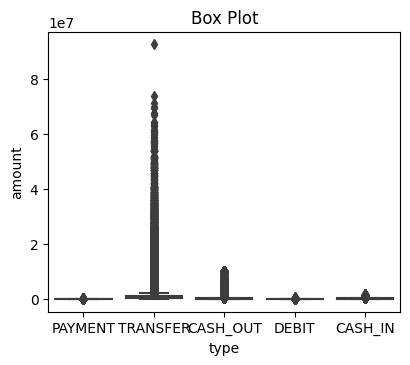

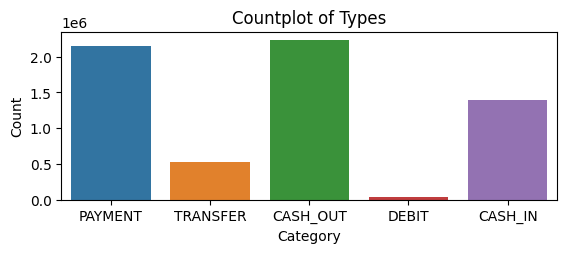

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))

# Box Plot
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="type", y="amount")
plt.title("Box Plot")
plt.show()
#count plot
plt.subplot(2, 1, 2)
sns.countplot(data=df, x="type")
plt.title("Countplot of Types")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

From the graphs it can be concluded that most of the payments type were either TRANSFER or CASH_OUT relative to amount but on the whole mostly, PAYMENT, CASH_OUT are the preferred types. That is because for transactions classified as fraud usually transfer of money is done or cash out is preferred.

In [16]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

This means that the data is not balanced.

To understand the percentage distribution of fraudulent and non fraudulent transactions, we will divide by the total count

In [17]:
100*df['isFraud'].value_counts()/len(df['isFraud'])

isFraud
0   99.87
1    0.13
Name: count, dtype: float64

So roughly 12% transcations are fraudulent

Checking in case multicollinearity exists among variables

In [18]:
import numpy as np
num = df.select_dtypes(include=[np.number])

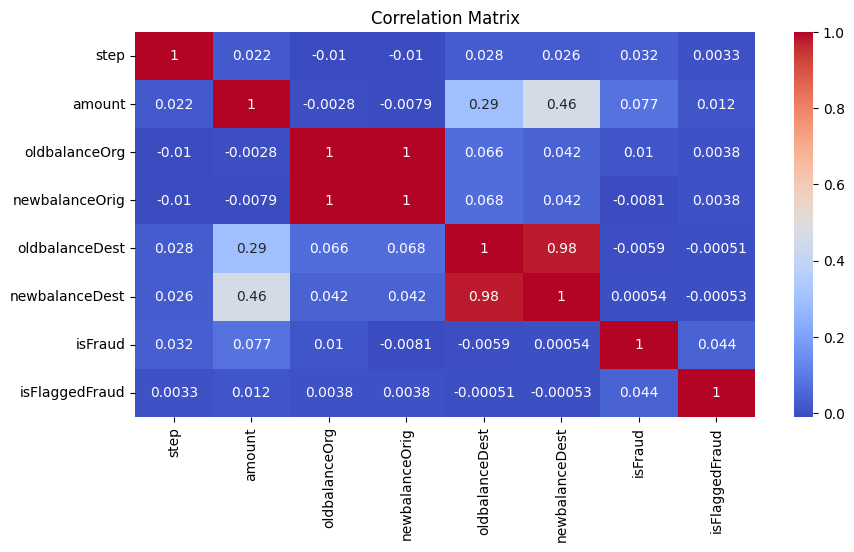

In [19]:
c=num.corr()
plt.figure(figsize=(10,5))
sns.heatmap(num.corr(),annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Numerical variables close to +1 or -1 have high multicollinearity which can be reduced with dimensionality reduction techniques. oldbalanceOrg and newbalanceOrig , oldbalanceDest and newbalanceDest. There will be less number of features so we should do feature scaling to normalize values in dataset. It indirectly affects multicollinearity. Besides this,feature selection will be done by using few necessary features only.

Feature Engineering

Encoding needs to be done for categorical columns like 'type'. This is due to the fact that some models work on numerical inputs data.

In [20]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0


Testing and Splitting data
(Using 'isFraud' as target var)

In [23]:
x = df.drop(columns=['isFraud'])    #input features
y = df['isFraud']   #target variable

SMOTE analysis will be used for introducing synthetic samples(resampling) followed by feature scaling to normalize the data. This is because
'isFraud' column is not balanced as discussed earlier

In [24]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [26]:
from imblearn.over_sampling import SMOTE
over_sample = SMOTE(random_state=0)     #on training data only
x,y = over_sample.fit_resample(x,y)     #increase in minority class

Feature selection using chi-squared (chi2) test with SelectKBest method

In [27]:
from sklearn.feature_selection import chi2, SelectKBest
col = SelectKBest(chi2,k=8)        #highest chi-squared test score
kbest = col.fit_transform(x,y)     #on input and target

8 Features with highest chi-squared test score are selected


In [28]:
feature_scores = list(zip(df.drop(columns=['isFraud']).columns, col.scores_))  #pair columns with scores_ attribute of SelectKBest
scores_df = pd.DataFrame(feature_scores, columns=['Feature', 'Score'])  #Provide column names
resdf = scores_df.sort_values(by='Score', ascending=False)
print(resdf) 

          Feature            Score
2          amount 6412058360482.70
5  newbalanceOrig 2704230115102.52
4   oldbalanceOrg 1698221960377.23
7  oldbalanceDest 1299818365471.98
6        nameDest 1292453482184.58
8  newbalanceDest    2495436181.97
3        nameOrig     621513836.08
0            step     166210746.88
1            type        898001.07
9  isFlaggedFraud          7129.00


apply Logistic Regression using 8 important Features

In [29]:
x1 = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y1 = df['isFraud']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.30,random_state=0)

In [30]:
log_reg = LogisticRegression()
log_reg.fit(x1_train,y1_train)

LogisticRegression()

In [31]:
y2_pred = log_reg.predict(x1_test)
print(classification_report(y1_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.63      0.36      0.46      2419

    accuracy                           1.00   1908786
   macro avg       0.81      0.68      0.73   1908786
weighted avg       1.00      1.00      1.00   1908786



In [32]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y1_test, y2_pred)  # Use probabilities of the positive class

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.6819631317097187


ROC AUC score is greater than 0.5 which means that it can perform finely with test data.

Cross Validation to observe generalized performance

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
crossv = cross_val_score(log_reg,x1,y1,cv=3)  #3 fold cross validation
print(crossv)
print(crossv.mean())

[0.99683338 0.99912772 0.99904238]
0.9983344913732252


A 3 fold cross validation score of 0.99 suggests that this fraud detection model can be deployed. 

SUMMARY:

This code seems to fulfil all the requirements of the fraud detection model developed on linear regression after working on all missing values, outliers and multicollinearity issue. Feature scaling was done, the important features were selected and then linear regression model was fit. Lastly, the classification report was generated to determine accuracy.

We can say that overfitting problem also won't occure because randon state has been taken as 0 so the dataset performs well on test data and doesn't suit itself to test data obtained from the train test split function.


The company should start real time monitoring of transactions to observe transactions crossing a threshold. Transaction limit should be always checked.
As a step for further improvement, other ML models can be fitted and their scores can be checked.

In order to check how effective this model works, it can be tested ona new dataset too. Moreover, the results obtained using the developed model should be compared to the number of fraudulent transactions that occured before the existence of the model.